Goal:
- Select features via Random Forest and LaSSO and compare the results

In [34]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pl
import datetime
import pickle
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import statsmodels.formula.api as smf  

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import RandomizedLasso
from sklearn.metrics import median_absolute_error
from sklearn.linear_model import LinearRegression

In [221]:
def feat_sel(df, output, model='rf', alpha=100, feat_num=20):
    '''
    performs random forest or lasso fit on specified dataframe and produces a list of 
    the top specified number of features and returns a sorted list of the features and their scores.
    '''
    regressors = list(set(df.columns) - set([output]))

    y = df[output]
    X = df[regressors] #select all the columns after id and geography -- the regressors
    names = X.columns

    rlasso = RandomizedLasso(alpha=alpha,random_state=0, normalize=True, fit_intercept=True)
    rlasso.fit(X, y)

    rf = RandomForestRegressor(random_state=0,n_estimators=100)
    rf.fit(X, y)

    if model == 'lasso':
        feat_sort = (sorted(zip(map(lambda x: round(x, 10), rlasso.scores_), names), reverse=True))
    else: 
        feat_sort = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))
        print ('R-Score', rf.score(X, y))

    pl.figure(figsize=(8,6))
    pl.title("{} Feature importance".format(model))
    pl.bar(np.arange(feat_num), pd.DataFrame(feat_sort)[0][:feat_num], align='center')
    pl.xticks(np.arange(feat_num))
    pl.ylabel('Importance Score')

    print("{} Feature ranking:".format(model), pd.DataFrame(feat_sort)[:5])
    return feat_sort

In [196]:
path = './data/consolidatedClean.csv'
data = pd.read_csv(path)
data.head()

,Unnamed: 0,zip,tc_2 # OF PROPERTIES,tc_2 FY'2017 MARKET VALUE LAND,tc_2 FY'2017 MARKET VALUE TOTAL,tc_2 FY'2017 ASSESSED VALUE LAND,tc_2 FY'2017 ASSESSED VALUE TOTAL,tc_2 FY'2017 EXEMPT VALUE LAND,tc_2 FY'2017 EXEMPT VALUE TOTAL,tc_2 FY'2017 ACTUAL ASSESSED VALUE LAND,...,listing,listingsHouseholdsRatio,listings_per_sqmi,note,park_area,sq_mi_area,stop_density,tree_count,tree_density,zip_area
0,0,10001,1471,780125048,4538886185,290671105,1658138801,81524077,686730527,320717141,...,126,0.010826,202.783689,NaN,0.005287,0.621352,0.000004,911.000,1466.158257,0.621352
1,1,10002,2480,1119441624,4725893887,433821548,1705825116,194114612,763757475,449310179,...,217,0.006507,246.770728,NaN,0.158087,0.879359,0.000002,2265.000,2575.740552,0.879359
2,2,10003,3735,1598012608,8310198962,521608957,2700093121,33872345,198475327,537001788,...,190,0.006912,329.625393,NaN,0.037266,0.576412,0.000005,2025.000,3513.112743,0.576412
3,3,10004,833,86698487,644247080,33694636,239754510,326200,48617039,33694659,...,3,0.001906,5.360108,NaN,0.115819,0.559690,0.000002,118.000,210.830927,0.559690
4,4,10005,1650,371514875,1650726876,166694449,648149892,4251656,143404591,166694449,...,21,0.004939,285.658117,NaN,0.172902,0.073514,0.000002,3736.816,2842.071016,1.449180


In [197]:
data.drop(['Unnamed: 0',  'Unnamed: 0.1'], axis=1, inplace=True)

In [198]:
for i in data.columns:
    nulls = data[i].isnull().sum()
    if nulls > 0:
        print (i, data[i].isnull().sum(), '\n\n')

GEO.display-label 61 


GEO.id 61 


NAICS.display-label 61 


RCPSZFE.display-label 61 


note 171 




In [203]:
data.columns

Index(['zip', 'tc_2 # OF PROPERTIES', 'tc_2  FY'2017 MARKET VALUE LAND',
       'tc_2  FY'2017 MARKET VALUE TOTAL', 'tc_2  FY'2017 ASSESSED VALUE LAND',
       'tc_2  FY'2017 ASSESSED VALUE TOTAL', 'tc_2  FY'2017 EXEMPT VALUE LAND',
       'tc_2  FY'2017 EXEMPT VALUE TOTAL',
       'tc_2  FY'2017 ACTUAL ASSESSED VALUE LAND',
       'tc_2  FY'2017 ACTUAL ASSESSED VALUE TOTAL',
       ...
       'boro', 'hotel_rooms_per_sqmi', 'listingsHouseholdsRatio',
       'listings_per_sqmi', 'park_area', 'sq_mi_area', 'stop_density',
       'tree_count', 'tree_density', 'zip_area'],
      dtype='object', length=580)

In [208]:
data.drop(['listings_per_sqmi'], axis=1, inplace=True)

In [204]:
data.drop(['bcode','note','boro','listings_per_sqmi',
           'listing','geometry','Id','GEO.id',
           'Geography','GEO.display-label', 'NAICS.display-label',
          'RCPSZFE.display-label'], axis=1, inplace=True)

ValueError: labels ['bcode' 'note' 'listing' 'geometry' 'Id' 'GEO.id' 'Geography'
 'GEO.display-label' 'NAICS.display-label' 'RCPSZFE.display-label'] not contained in axis

In [209]:
print ('total number of samples: ', len(data))
print ('total number of regressors: ', len(data.columns)-1)

total number of samples:  173
total number of regressors:  577


### Random Forest Feature Selection

/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


R-Score 0.956428148976
rf Feature ranking:         0                                                  1
0  0.2591  Percent; PLACE OF BIRTH - Total population - N...
1  0.1955  Percent; RELATIONSHIP - Population in househol...
2  0.0715  Percent; MARITAL STATUS - Females 15 years and...
3  0.0291  Percent; MARITAL STATUS - Males 15 years and o...
4  0.0223  Percent; MARITAL STATUS - Males 15 years and o...


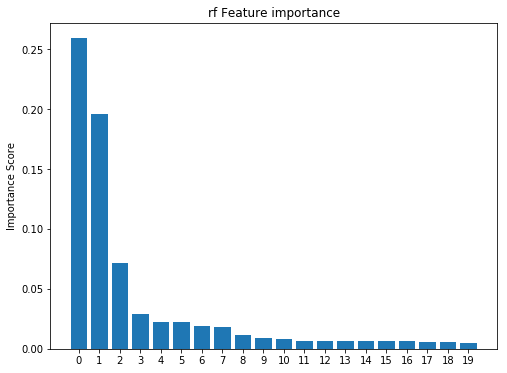

In [222]:
rf_res = pd.DataFrame(feat_sel(data, 'listingsHouseholdsRatio'))

Select the first 11 features, at that point the feature importance flatlines.

In [223]:
rf_feats = list(rf_res[1][:11])

In [224]:
rf_feats

['Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1950 to 1959',
 'Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- drove alone',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- carpooled']

### LASSO Feature Selection

/Users/baileygriswold/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


lasso Feature ranking:        0                                                  1
0  0.505  Percent; RELATIONSHIP - Population in househol...
1  0.345  Percent; UNITS IN STRUCTURE - Total housing un...
2  0.300  Percent; UNITS IN STRUCTURE - Total housing un...
3  0.280  Percent; MARITAL STATUS - Males 15 years and o...
4  0.210  Percent; HOUSEHOLDS BY TYPE - Total households...


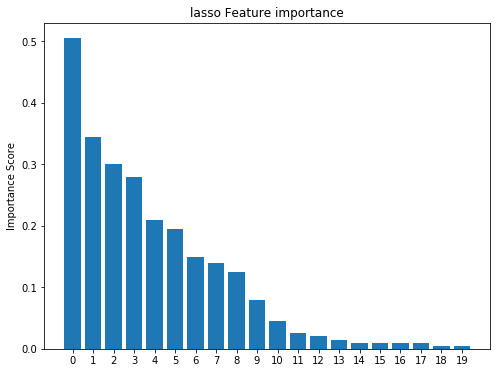

In [225]:
#with fit intercept set to true and normalize set to true
lasso_res = pd.DataFrame(feat_sel(data, 'listingsHouseholdsRatio', model='lasso',alpha=.0001))

Select the first 14 features.

In [226]:
las_feats = list(lasso_res[1][:14])

In [227]:
las_feats

['Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families)',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households',
 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; INDUSTRY - Civilian employed population 16 years and over - Information',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives - Unmarried

### Compare the features selected by LASSO and Random Forest

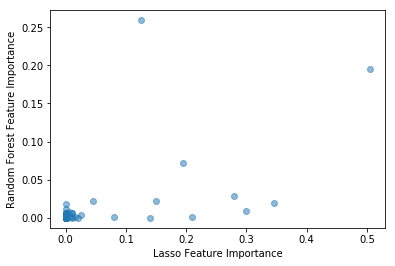

In [228]:
feats = pd.merge(lasso_res, rf_res, on=1, suffixes=('_lasso', '_rf'))
pl.plot(feats['0_lasso'], feats['0_rf'], 'o', alpha=.5)
pl.xlabel('Lasso Feature Importance')
pl.ylabel('Random Forest Feature Importance')

### Constructing Models

In [229]:
#split data into training and test sets
train, test = train_test_split(data, test_size=0.3, random_state=0)

In [272]:
def mdl_eval(mdl, output, regressors, test, train, color):
    ''' For a specific model, produce the in sample R square value, the out of sample r sqaure, 
        and the median absolute error. Returns the '''
    
    print ('In Sample RSquared: ', mdl.score(train[regressors], train[output]))
    Rout = r2_score(test[output], mdl.predict(test[regressors]))
    R = Rout
    p = len(regressors)
    n = len(test)
    Radj = R - ((1 - R)*((p)/(n-p-1)))
    print ('Out of sample R-Squared: ', Rout)
    print ('Out of sample Adjusted R-Squared: ', Radj)
    model_score = median_absolute_error(test[output], mdl.predict(test[regressors]))
    print ('Model Eval (Median Absolute Error): ', model_score)
    
    pl.figure(figsize=(8,6))
    pl.title("Radj = {}, p = {}".format(Radj, p), fontsize=16)
    pl.plot(test[output], mdl.predict(test[regressors]), 'o', alpha=.5, c=color)
    pl.plot(test[output], test[output])
    pl.xlabel('Observed Values', fontsize=14)
    pl.ylabel('Predicted Values', fontsize=14)
    
    return (Radj, model_score)

In [231]:
output = 'listingsHouseholdsRatio'
y_train = train[output]
y_test = test[output]

** * OLS Model - RF features * **

Linear Model on Random Forest Selected Features 

In Sample RSquared:  0.711967404507
Out of sample R-Squared:  0.586161531493
Out of sample Adjusted R-Squared:  0.472355952653
Model Eval (Median Absolute Error):  0.00104900309259


(0.47235595265315666, 0.0010490030925874364)

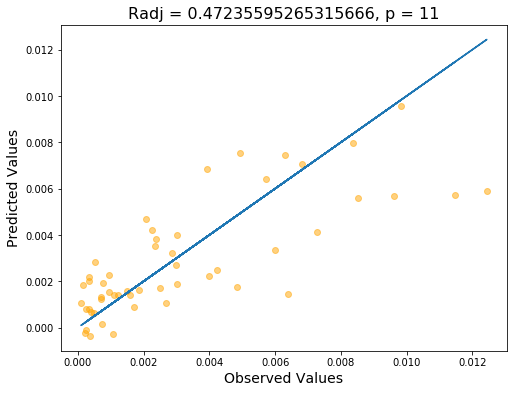

In [273]:
lm_rf = LinearRegression()
lm_rf.fit(train[rf_feats],y_train)
print ('Linear Model on Random Forest Selected Features', '\n')
mdl_eval(lm_rf, output, rf_feats, test, train, 'orange')

In [233]:
print ('Regressors ({}): '.format(len(rf_feats)))
rf_feats

Regressors (11): 


['Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1950 to 1959',
 'Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- drove alone',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; COMMUTING TO WORK - Workers 16 years and over - Car, truck, or van -- carpooled']

** * OLS - LASSO Features * **

Linear Model on Lasso Selected Features 

In Sample RSquared:  0.753706776174
Out of sample R-Squared:  0.58656387592
Out of sample Adjusted R-Squared:  0.430128585727
Model Eval (Median Absolute Error):  0.000943364687627


(0.43012858572705759, 0.00094336468762743777)

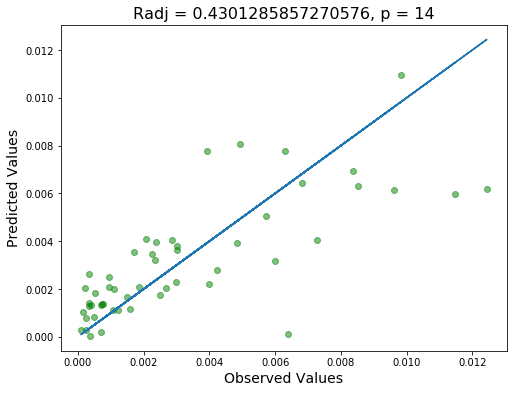

In [274]:
lm_l = LinearRegression()
lm_l.fit(train[las_feats],y_train)
print ('Linear Model on Lasso Selected Features', '\n')
mdl_eval(lm_l, output, las_feats, test, train, 'green')

In [236]:
print ('Regressors ({}): '.format(len(las_feats)))
las_feats

Regressors (14): 


['Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families)',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Nonfamily households',
 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; INDUSTRY - Civilian employed population 16 years and over - Information',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; HOUSEHOLDS BY TYPE - Total households - Family households (families) - Married-couple family',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives - Unmarried

** * OLS on shared features between LASSO and Random Forest * **

In [237]:
shared_feats = list(set(rf_feats) & set(las_feats))

In [238]:
shared_feats

['Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married']

Linear Model on Shared Features 

In Sample RSquared:  0.694976142826
Out of sample R-Squared:  0.587806874206
Out of sample Adjusted R-Squared:  0.511119781036
Model Eval (Median Absolute Error):  0.000884804649023


(0.51111978103552491, 0.00088480464902309752)

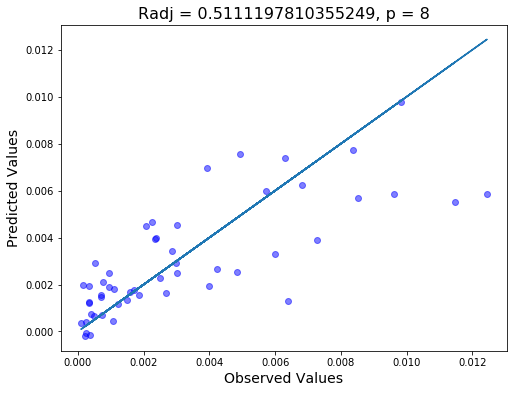

In [276]:
lm_sh = LinearRegression()
lm_sh.fit(train[shared_feats],y_train)
print ('Linear Model on Shared Features', '\n')
mdl_eval(lm_sh, output, shared_feats, test, train, 'blue')

In [240]:
print ('Regressors ({}): '.format(len(shared_feats)))
shared_feats

Regressors (8): 


['Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married']

** * Removing weak features from RF * **

1
Linear Model on Random Forest Selected Features 

In Sample RSquared:  0.71194856281
Out of sample R-Squared:  0.586440504197
Out of sample Adjusted R-Squared:  0.485572334489
Model Eval (Median Absolute Error):  0.0010422530981
2
Linear Model on Random Forest Selected Features 

In Sample RSquared:  0.686651452744
Out of sample R-Squared:  0.604167250519
Out of sample Adjusted R-Squared:  0.519345947059
Model Eval (Median Absolute Error):  0.00101977108689
3
Linear Model on Random Forest Selected Features 

In Sample RSquared:  0.681185268757
Out of sample R-Squared:  0.599848146735
Out of sample Adjusted R-Squared:  0.525401290314
Model Eval (Median Absolute Error):  0.00109771450678
4
Linear Model on Random Forest Selected Features 

In Sample RSquared:  0.681102101792
Out of sample R-Squared:  0.599924813197
Out of sample Adjusted R-Squared:  0.536276488024
Model Eval (Median Absolute Error):  0.00111050851974
5
Linear Model on Random Forest Selected Features 

In Sample RSquared

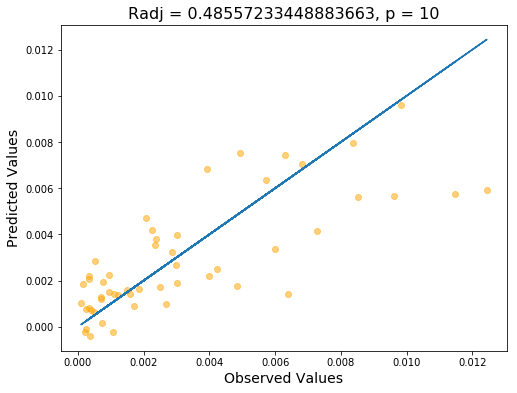

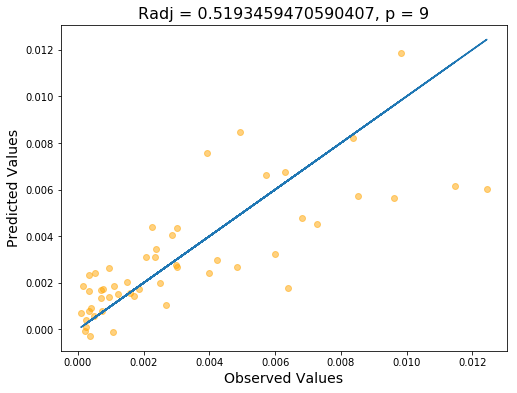

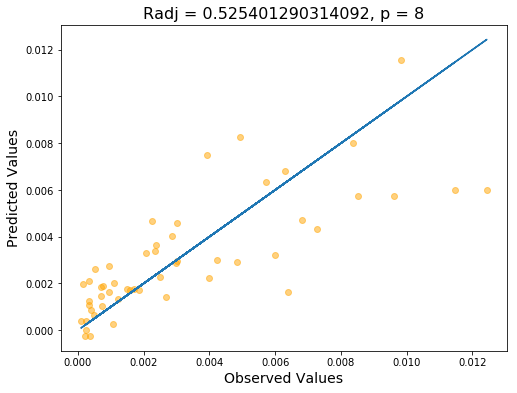

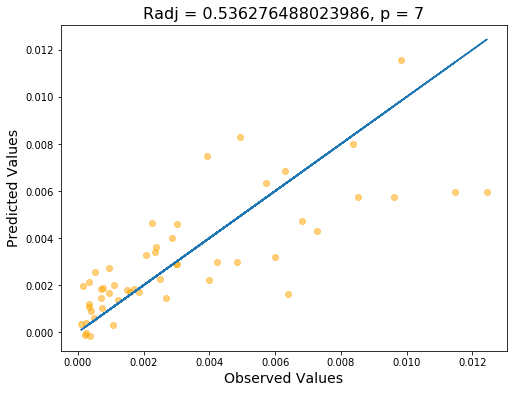

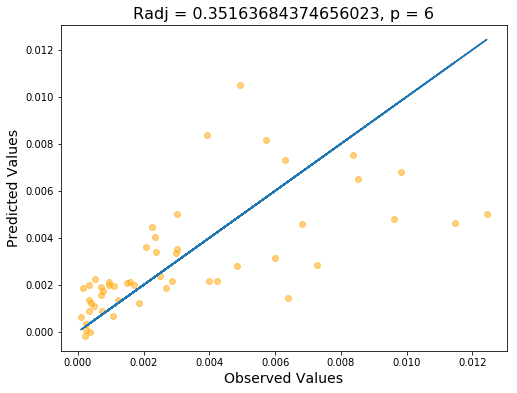

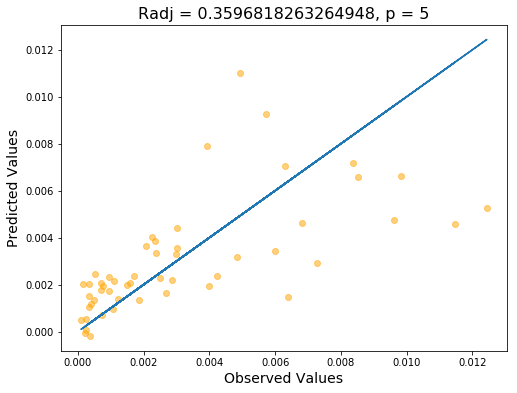

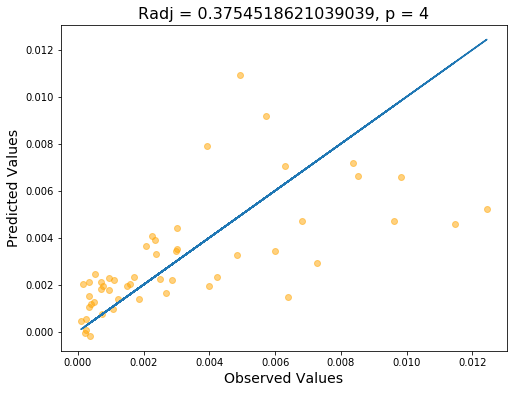

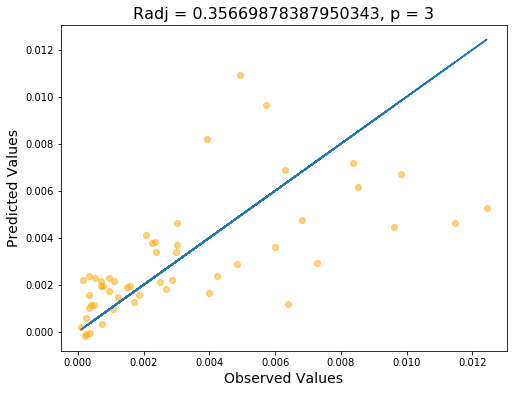

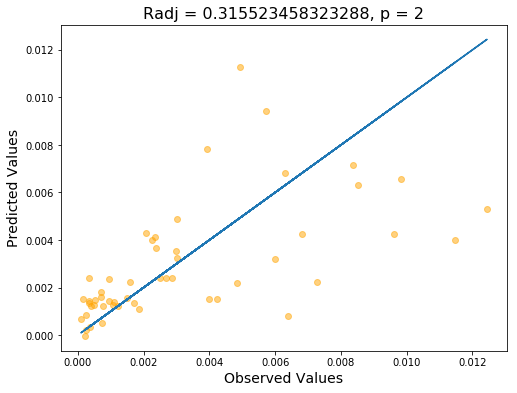

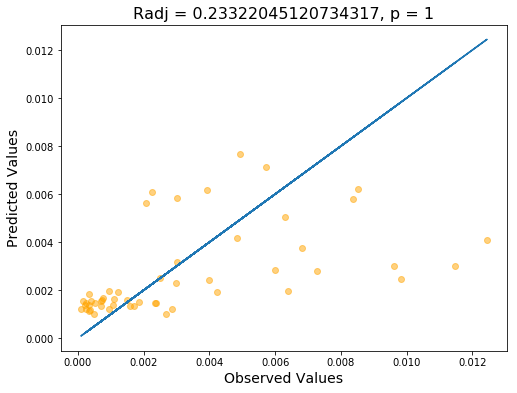

In [277]:
lm_rf = LinearRegression()
for i in np.arange(1, len(rf_feats)):
    print (i)
    lm_rf.fit(train[rf_feats[:-i]],y_train)
    print ('Linear Model on Random Forest Selected Features', '\n')
    mdl_eval(lm_rf, output, rf_feats[:-i], test, train, 'orange')

** * Removing weak features from LASSO * **

1
Linear Model on LASSO Selected Features 

In Sample RSquared:  0.749985638935
Out of sample R-Squared:  0.587874492589
Out of sample Adjusted R-Squared:  0.446884187423
Model Eval (Median Absolute Error):  0.00111387233681
2
Linear Model on LASSO Selected Features 

In Sample RSquared:  0.725158413375
Out of sample R-Squared:  0.562503414568
Out of sample Adjusted R-Squared:  0.427889080588
Model Eval (Median Absolute Error):  0.00104189197773
3
Linear Model on LASSO Selected Features 

In Sample RSquared:  0.708313989501
Out of sample R-Squared:  0.57113463905
Out of sample Adjusted R-Squared:  0.453196664789
Model Eval (Median Absolute Error):  0.00104619887995
4
Linear Model on LASSO Selected Features 

In Sample RSquared:  0.706086683631
Out of sample R-Squared:  0.574692839757
Out of sample Adjusted R-Squared:  0.470959386039
Model Eval (Median Absolute Error):  0.00104423755264
5
Linear Model on LASSO Selected Features 

In Sample RSquared:  0.70476541041
Out of sample R-Square

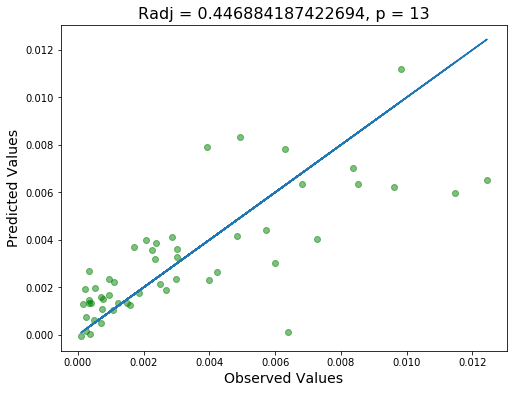

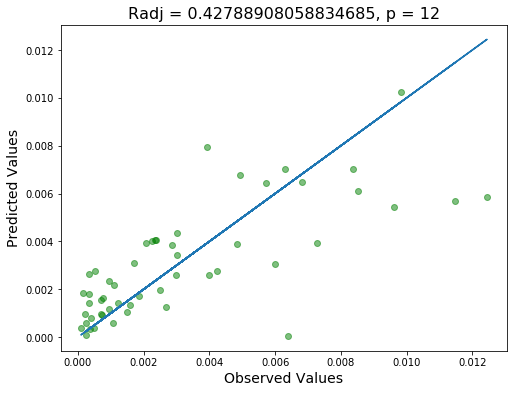

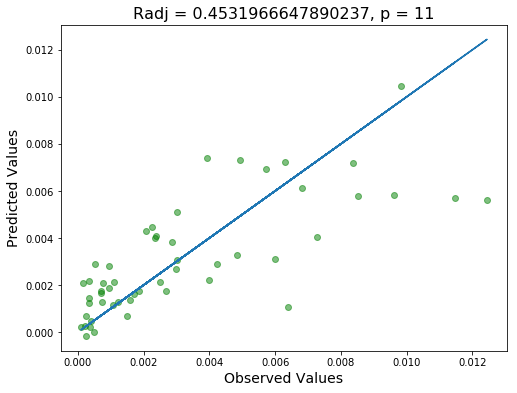

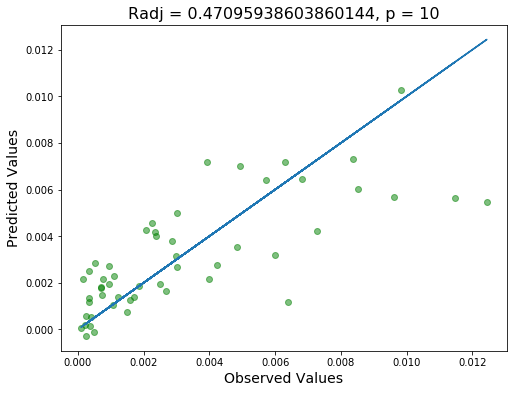

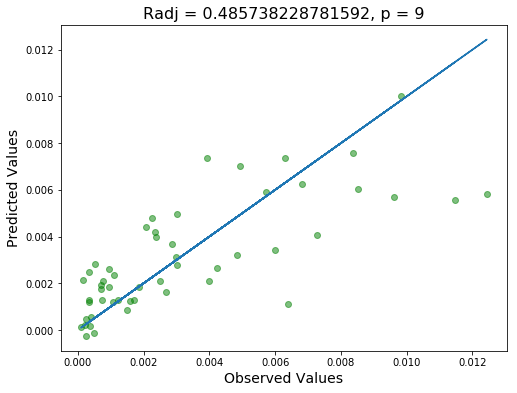

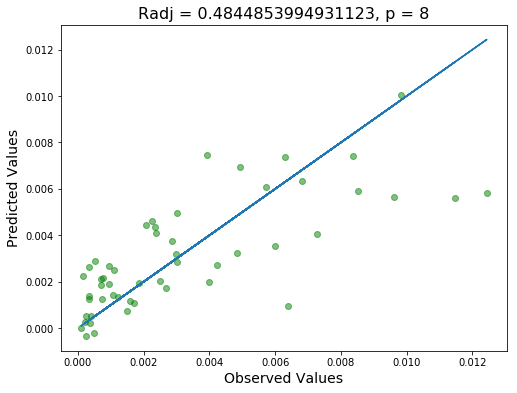

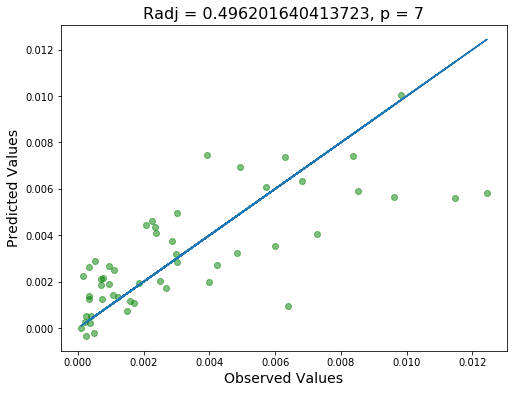

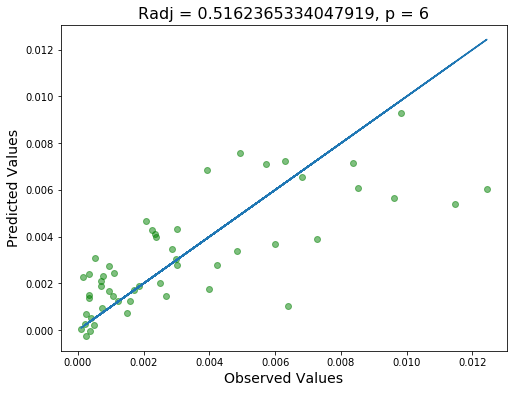

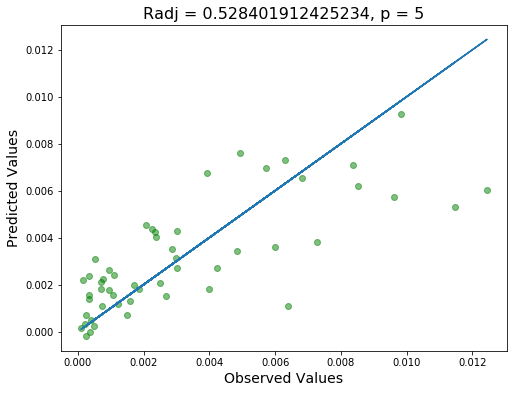

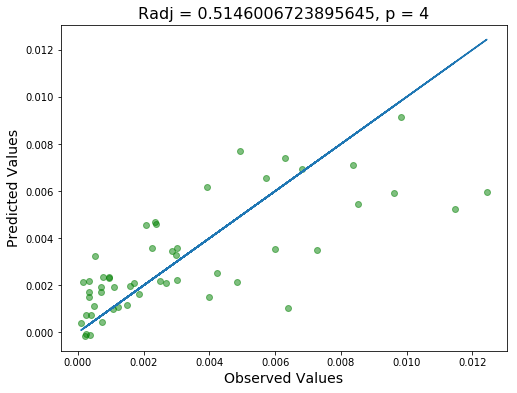

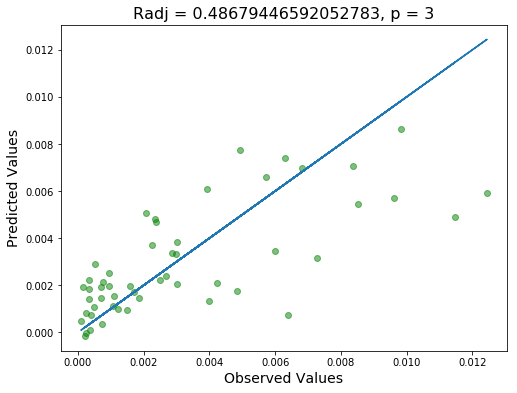

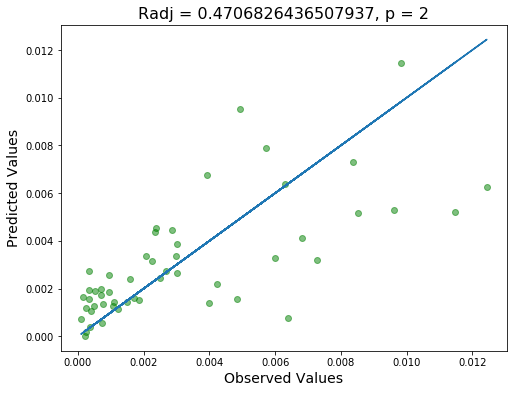

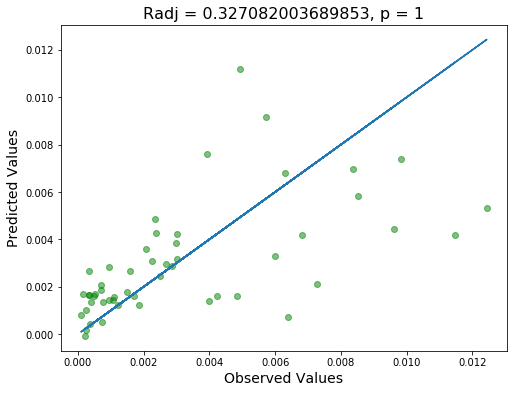

In [278]:
lm_las = LinearRegression()
for i in np.arange(1, len(las_feats)):
    print (i)
    lm_las.fit(train[las_feats[:-i]],y_train)
    print ('Linear Model on LASSO Selected Features', '\n')
    mdl_eval(lm_las, output, las_feats[:-i], test, train, 'green')

In [186]:
df = shared_feats + [output]

['Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units',
 'Percent; SEX AND AGE - 25 to 34 years',
 'Percent; RELATIONSHIP - Population in households - Nonrelatives',
 'Percent; MARITAL STATUS - Males 15 years and over - Never married',
 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state',
 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units',
 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated',
 'Percent; MARITAL STATUS - Females 15 years and over - Never married',
 'listingsHouseholdsRatio']

In [126]:
#make a dictionary of new column names for each alpha features
vals = []
for n in np.arange(len(shared_feats)): vals.append('feat_'+str(n))
feat_keys = dict(zip(shared_feats, vals))
print (feat_keys)

df.rename(columns=feat_keys, inplace=True)

{'Percent; UNITS IN STRUCTURE - Total housing units - 5 to 9 units': 'feat_0', 'Percent; SEX AND AGE - 25 to 34 years': 'feat_1', 'Percent; RELATIONSHIP - Population in households - Nonrelatives': 'feat_2', 'Percent; MARITAL STATUS - Males 15 years and over - Never married': 'feat_3', 'Percent; PLACE OF BIRTH - Total population - Native - Born in United States - Different state': 'feat_4', 'Percent; UNITS IN STRUCTURE - Total housing units - 10 to 19 units': 'feat_5', 'Percent; MARITAL STATUS - Males 15 years and over - Now married, except separated': 'feat_6', 'Percent; MARITAL STATUS - Females 15 years and over - Never married': 'feat_7'}


In [127]:
#split data into training and test sets
train, test = train_test_split(df, test_size=0.3, random_state=0)

In [128]:
rgrs = shared_feats

In [129]:
nmbr_rgrs = []
in_rsq = []
out_rsq = []

In [130]:
#fit model with all params
for i in np.arange(len(shared_feats)):
    print (i)
    lm = smf.ols(formula='listingsHouseholdsRatio ~ '+ '+'.join(rgrs)+'-1', data = train).fit()
    nmbr_rgrs.append(len(lm.params))
    print ('Within sample R-Squared: ', lm.rsquared)
    in_rsq.append(lm.rsquared)
    print ('Out of sample R-Squared: ', r2_score(test.listingsHouseholdsRatio, lm.predict(test)))
    out_rsq.append(r2_score(test.listingsHouseholdsRatio, lm.predict(test)))
    print ('Number of model parameters: ', len(lm.params))
    drp_key = lm.pvalues.index[(np.where(lm.pvalues == lm.pvalues.max()))]
    print ('Key to drop: ', drp_key, lm.pvalues.max())
    rgrs = rgrs[rgrs != drp_key[0]]
    if lm.pvalues.max() <= 0.05:
        break

0


SyntaxError: invalid syntax (<unknown>, line 1)

In [11]:
Y = data.listingsHouseholdsRatio
X = data.iloc[:, 1:-1] #select all the columns after id and geography -- the regressors
names = data.columns[7:]
rf = RandomForestRegressor()
rf.fit(X, Y)
print ("Features sorted by their score:")
feat_sort = (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))
print (feat_sort)

Features sorted by their score:
[(0.3268, 'Percent; MARITAL STATUS - Males 15 years and over - Widowed'), (0.1654, 'Percent; YEAR OF ENTRY - Population born outside the United States'), (0.05, 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2014 or later'), (0.0468, 'Percent; SEX AND AGE - 75 to 84 years'), (0.0247, 'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability'), (0.0227, 'Percent; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - $75,000 to $99,999'), (0.0195, 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)'), (0.0181, 'Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated'), (0.0165, 'Percent; HOUSE HEATING FUEL - Occupied housing units - Bottled, tank, or LP gas'), (0.0164, 'Percent; HOUSE HEATING FUEL - Occupied housing

(0.3281, 'Percent; YEAR OF ENTRY - Population born outside the United States')   
(0.1016, 'Percent; MARITAL STATUS - Males 15 years and over - Widowed')  
(0.071199999999999999, 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)')    
(0.045600000000000002, 'Percent; OCCUPATION - Civilian employed population 16 years and over')    
(0.034700000000000002, 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2014 or later')      
(0.034599999999999999, 'Percent; SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI) - Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed) - 15.0 to 19.9 percent')   
(0.023800000000000002, 'Percent; MARITAL STATUS - Females 15 years and over - Never married')  
(0.019599999999999999, 'Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated')     
(0.019099999999999999, 'Percent; MARITAL STATUS - Males 15 years and over - Never married')  
(0.016, 'Percent; PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL - All people')  
(0.0129, 'tc_2 Taxes w/out Exemption')  
(0.0129, 'Percent; RACE - One race - Some other race')  
(0.0121, 'Percent; INDUSTRY - Civilian employed population 16 years and over - Professional, scientific, and management, and administrative and waste management services')  
(0.0117, 'Percent; SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI) - Housing unit without a mortgage (excluding units where SMOCAPI cannot be computed) - 30.0 to 34.9 percent')  
(0.0109, 'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.00 or less')  

### Fit multivariate linear regression using features selected by random forest

In [12]:
i = 0
feats = []
while feat_sort[i][0] >= .01:
    feats.append(feat_sort[i][1])
    i+= 1

print (feats)

['Percent; MARITAL STATUS - Males 15 years and over - Widowed', 'Percent; YEAR OF ENTRY - Population born outside the United States', 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2014 or later', 'Percent; SEX AND AGE - 75 to 84 years', 'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability', 'Percent; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - $75,000 to $99,999', 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)', 'Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated', 'Percent; HOUSE HEATING FUEL - Occupied housing units - Bottled, tank, or LP gas', 'Percent; HOUSE HEATING FUEL - Occupied housing units - Coal or coke', 'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations', 'P

In [13]:
#make a new dataframe for the model with the selected feats
df = data[['listingsHouseholdsRatio']+ feats]

In [14]:
#make a dictionary of new column names for each alpha features
vals = []
for n in np.arange(len(feats)): vals.append('feat_'+str(n))
feat_keys = dict(zip(feats, vals))
print (feat_keys)

df.rename(columns=feat_keys, inplace=True)

{'Percent; SCHOOL ENROLLMENT - Population 3 years and over enrolled in school - High school (grades 9-12)': 'feat_13', 'Percent; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Total households - $75,000 to $99,999': 'feat_15', 'Percent; MARITAL STATUS - Males 15 years and over - Widowed': 'feat_0', 'Percent; HOUSE HEATING FUEL - Occupied housing units - Bottled, tank, or LP gas': 'feat_8', 'Percent; FERTILITY - Number of women 15 to 50 years old who had a birth in the past 12 months - Unmarried women (widowed, divorced, and never married)': 'feat_6', 'Percent; SEX AND AGE - 75 to 84 years': 'feat_3', 'Percent; INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS) - Families - $75,000 to $99,999': 'feat_5', 'Percent; RACE - One race - Black or African American': 'feat_14', 'Percent; HOUSE HEATING FUEL - Occupied housing units - Coal or coke': 'feat_9', 'Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Populat

C:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [15]:
#split training and test data
train, test = train_test_split(df, test_size=0.2)

In [16]:
rgrs = train.columns[1:]

In [17]:
nmbr_rgrs = []
in_rsq = []
out_rsq = []

In [18]:
#fit model with all params
for i in np.arange(len(rgrs)):
    print (i)
    lm = smf.ols(formula='listingsHouseholdsRatio ~ '+ '+'.join(rgrs)+'-1', data = train).fit()
    nmbr_rgrs.append(len(lm.params))
    print ('Within sample R-Squared: ', lm.rsquared)
    in_rsq.append(lm.rsquared)
    print ('Out of sample R-Squared: ', r2_score(test.listingsHouseholdsRatio, lm.predict(test)))
    out_rsq.append(r2_score(test.listingsHouseholdsRatio, lm.predict(test)))
    print ('Number of model parameters: ', len(lm.params))
    drp_key = lm.pvalues.index[(np.where(lm.pvalues == lm.pvalues.max()))]
    print ('Key to drop: ', drp_key, lm.pvalues.max())
    rgrs = rgrs[rgrs != drp_key[0]]
    if lm.pvalues.max() <= 0.05:
        break

0
('Within sample R-Squared: ', 0.76210003543282956)
('Out of sample R-Squared: ', -0.19647148671623893)
('Number of model parameters: ', 16)
('Key to drop: ', Index([u'feat_10'], dtype='object'), 0.94991528812565007)
1
('Within sample R-Squared: ', 0.76209231000172939)
('Out of sample R-Squared: ', -0.19387201755600203)
('Number of model parameters: ', 15)
('Key to drop: ', Index([u'feat_3'], dtype='object'), 0.76349610285197234)
2
('Within sample R-Squared: ', 0.76191641509057884)
('Out of sample R-Squared: ', -0.16381571070689827)
('Number of model parameters: ', 14)
('Key to drop: ', Index([u'feat_5'], dtype='object'), 0.7295030643597169)
3
('Within sample R-Squared: ', 0.76168580119616425)
('Out of sample R-Squared: ', -0.12548937896350787)
('Number of model parameters: ', 13)
('Key to drop: ', Index([u'feat_15'], dtype='object'), 0.54310698255153322)
4
('Within sample R-Squared: ', 0.76097687288531757)
('Out of sample R-Squared: ', -0.12142922121278898)
('Number of model paramete

Text(0.5,0,u'Number of Regressors')

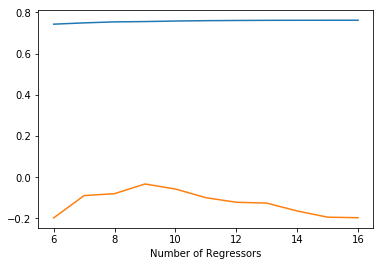

In [19]:
pl.plot(nmbr_rgrs, in_rsq, label='In sample R-Square')
pl.plot(nmbr_rgrs, out_rsq, label='Out of sample R-Square')
pl.xlabel('Number of Regressors')

In [20]:
rgrs

Index([u'feat_4', u'feat_7', u'feat_11', u'feat_12', u'feat_13'], dtype='object')

In [21]:
feat_keys[rgrs]

TypeError: unhashable type: 'Index'

In [22]:
feat_keys.values()

['feat_13',
 'feat_15',
 'feat_0',
 'feat_8',
 'feat_6',
 'feat_3',
 'feat_5',
 'feat_14',
 'feat_9',
 'feat_4',
 'feat_11',
 'feat_2',
 'feat_12',
 'feat_7',
 'feat_1',
 'feat_10']

In [23]:
#key = 
for val in rgrs:
    print (next(key for key, value in feat_keys.items() if value == val))

Percent; DISABILITY STATUS OF THE CIVILIAN NONINSTITUTIONALIZED POPULATION - Total Civilian Noninstitutionalized Population - With a disability
Percent; MARITAL STATUS - Females 15 years and over - Now married, except separated
Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1950 to 1959
Percent; SEX AND AGE - Total population - Male
Percent; SCHOOL ENROLLMENT - Population 3 years and over enrolled in school - High school (grades 9-12)


### Feature Selection using Lasso Regularization

In [24]:
from sklearn.linear_model import RandomizedLasso
from sklearn.datasets import load_boston
boston = load_boston()
 
rlasso = RandomizedLasso(alpha=0.00000001)
rlasso.fit(X, Y)
 
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 10), rlasso.scores_), names), reverse=True))

Features sorted by their score:
[(0.945, 'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2014 or later'), (0.82, 'Percent; SCHOOL ENROLLMENT - Population 3 years and over enrolled in school - Kindergarten'), (0.77, 'Percent; SELECTED MONTHLY OWNER COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME (SMOCAPI) - Housing units with a mortgage (excluding units where SMOCAPI cannot be computed) - Less than 20.0 percent'), (0.725, 'Percent; OCCUPANTS PER ROOM - Occupied housing units - 1.51 or more'), (0.695, 'Percent; SEX AND AGE - 65 to 74 years'), (0.68, 'Percent; MORTGAGE STATUS - Owner-occupied units - Housing units without a mortgage'), (0.67, 'Percent; RACE - Two or more races - White and American Indian and Alaska Native'), (0.67, 'Percent; ANCESTRY - Total population - Portuguese'), (0.65, 'Percent; OCCUPATION - Civilian employed population 16 years and over - Sales and office occupations'), (0.62, 'Percent; VALUE - Owner-occupied units'), (0.61, 'Percent; YEAR STRUCTURE BUILT - 